# k-means
You can use external libraries for linear algebra operations but you are expected
to write your own algorithms.
## Exercise 1
- Download the [breast cancer.csv](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer) dataset and preprocess it by using `sklearn.preprocessing.OrdinalEncoder` to properly deal with the categorical variables.
- Write your own function to compute the Mutual Information Criterion.
- Compute the Mutual Information between the covariates and the response variable (stored in the last column).

Which features appear to be the most significant?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from unsupervised_learning import mutual_information_criterion
from unsupervised_learning.clustering import KMeans, KMedoids

In [12]:
df = pd.read_csv("Unsupervised_Learning_2024/Datasets/breast-cancer-data.csv")
df = df.astype("str")
encoder = OrdinalEncoder(dtype=int)
encoder.fit(np.array(df))
encoded = encoder.fit_transform(df)
X   = encoded[:,1:]
y = encoded[:, 0]
mutual_information_criterion(X, y)


array([       nan, 0.00138741,        nan,        nan, 0.03702975,
       0.05337916, 0.00172524,        nan, 0.01789638])

## Exercise 2
- Use the dataset s3.txt available in the Datasets folder.
- Write your own implementation of the k-means clustering algorithm.
- Test your implementation with 10 different initializations and k = 15.
- Plot the clustering results for which the loss is, respectively, the highest and the lowest.

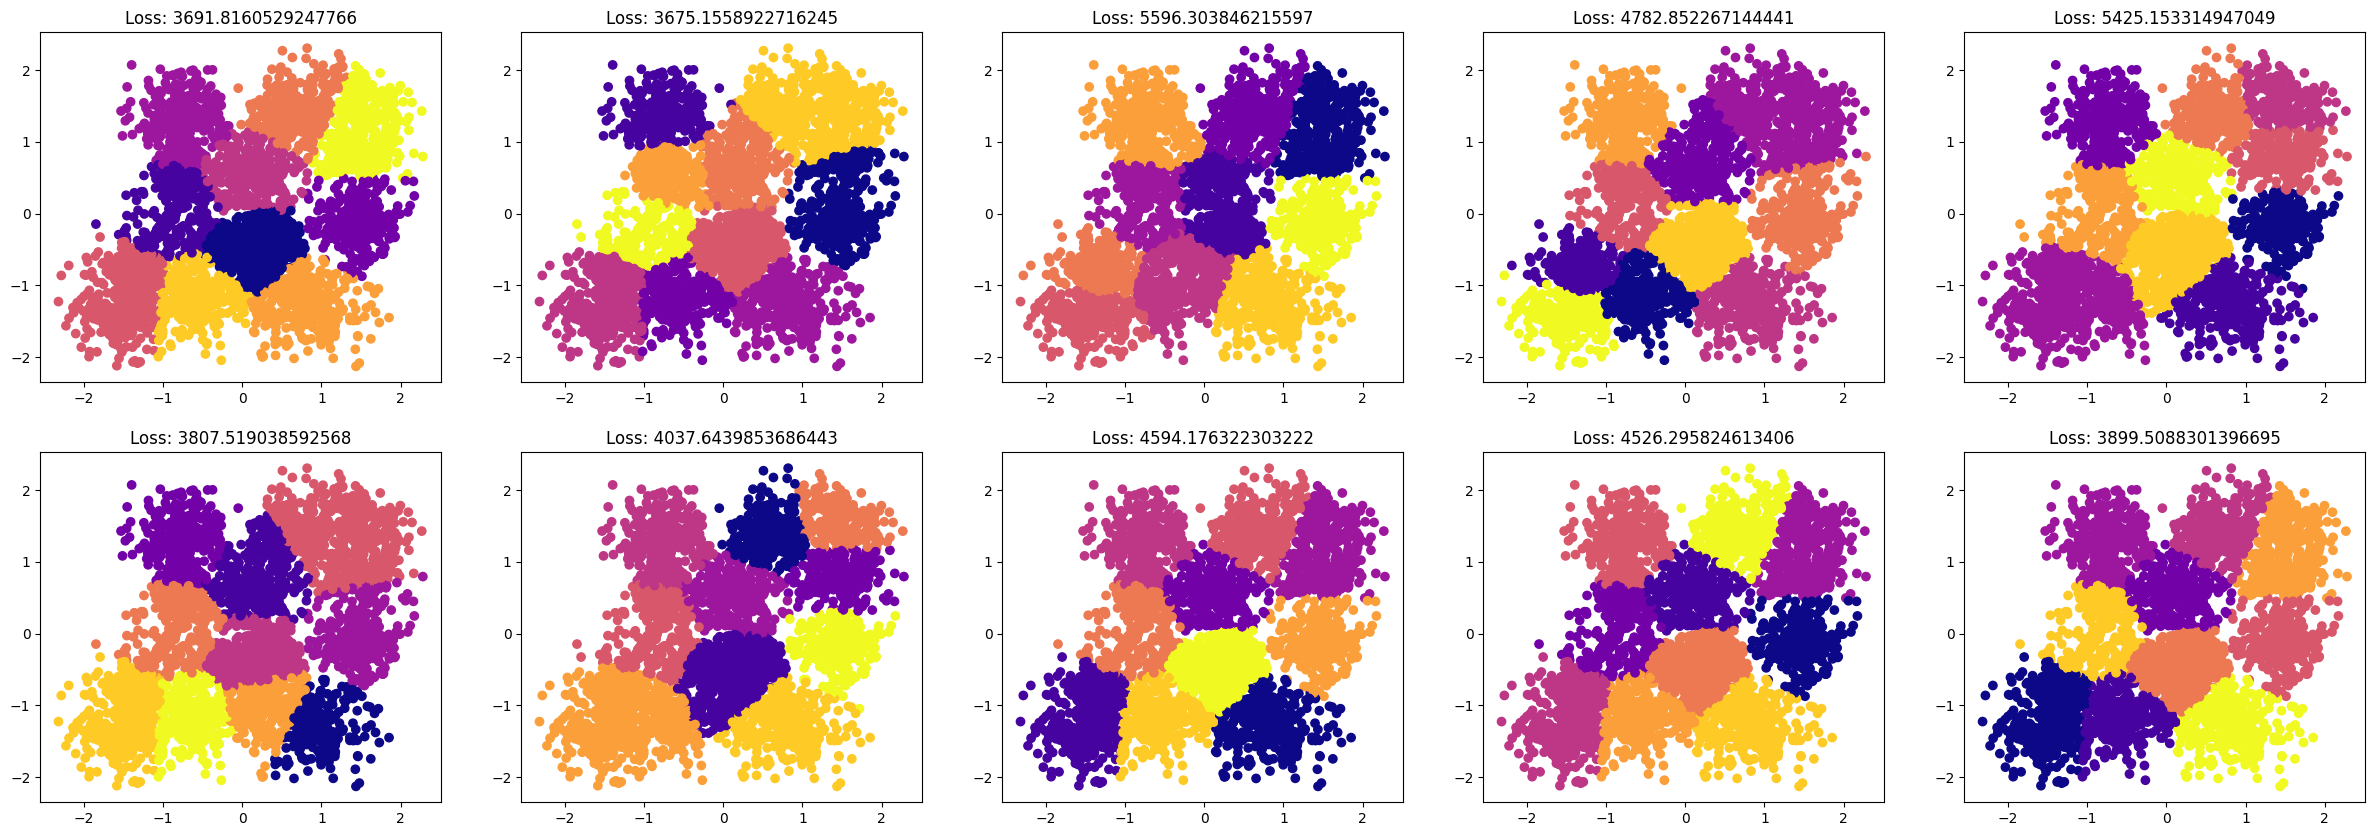

In [13]:
data = np.loadtxt("Unsupervised_Learning_2024/Datasets/s3.txt")
data = (data - data.mean()) / data.std()
kmeans = cl.KMeans(10, 'random')
fig, axes = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
  clusters = kmeans.fit_predict(data)
  ax = axes[i//5, i%5]
  ax.scatter(data[:,0],data[:,1],c=clusters, cmap="plasma")
  ax.set_title(f"Loss: {kmeans.loss}")

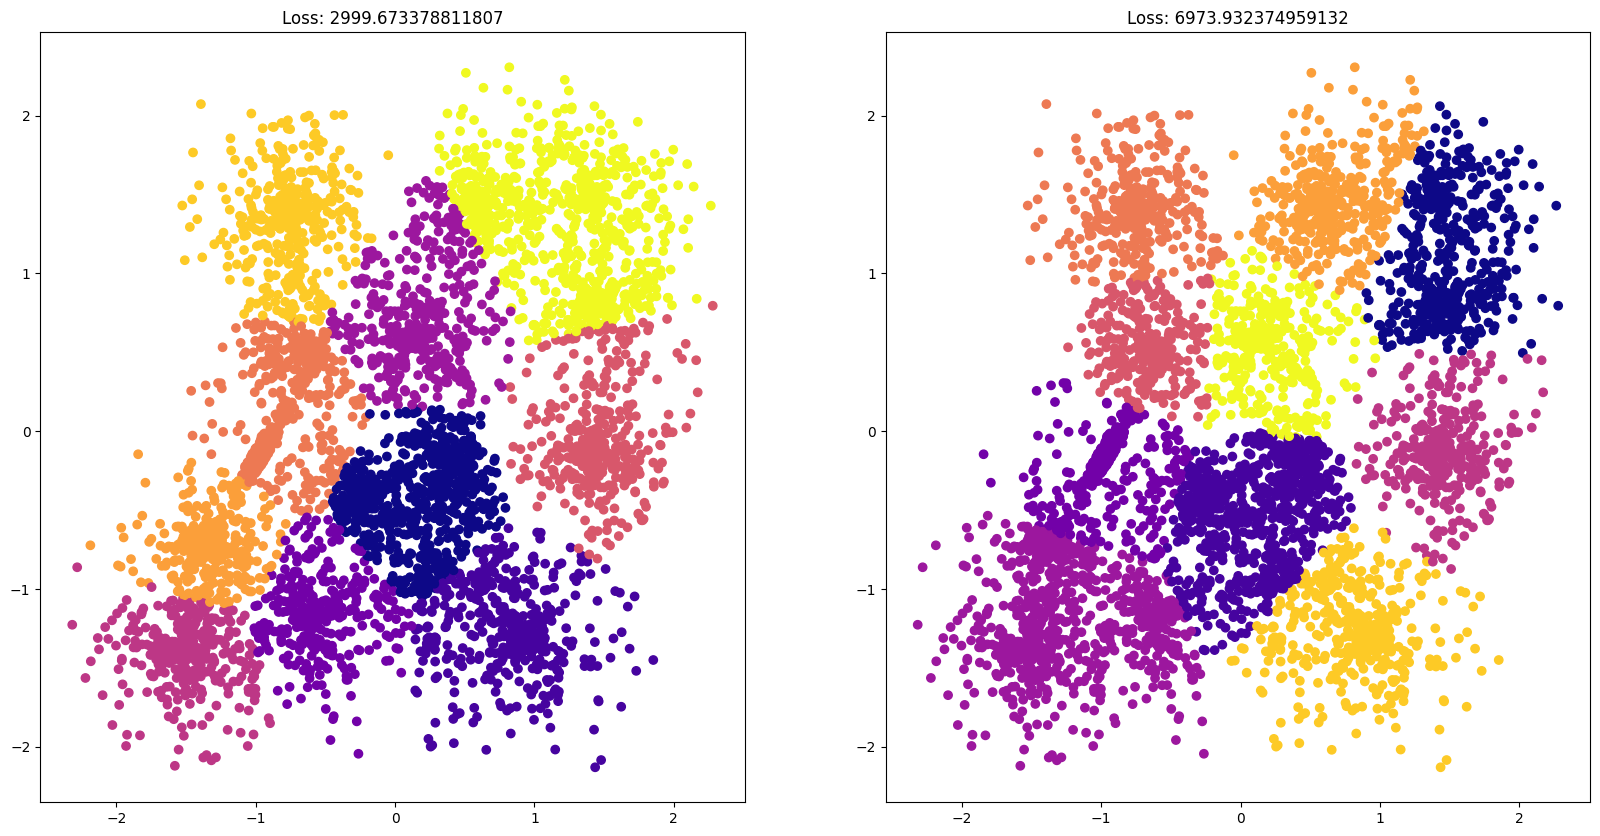

In [14]:
kmeans_array = []
for i in range(10):
  kmeans_array.append(cl.KMeans(10, 'random'))
  kmeans_array[i].fit(data)
  kmeans_array[i].predict(data)
losses = []
for cluster in kmeans_array:
  losses.append(cluster.loss)
best = np.argmin(losses)
worst = np.argmax(losses)
fig, axes = plt.subplots(1, 2, figsize=(20,10))
for i in range(2):
  if i == 0:
    points = kmeans_array[best].predict(data)
  else:
    points = kmeans_array[worst].predict(data)  
  ax = axes[i]
  ax.scatter(data[:,0], data[:,1], c=points, cmap='plasma')
  if i==0:
    ax.set_title(f"Loss: {kmeans_array[best].loss}")
  else:
    ax.set_title(f"Loss: {kmeans_array[worst].loss}")

## Notes
k-means can be quite slow if not programmed correctly. Of course, the goal of the exercise is not to produce the most efficient code (ie. it’s ok if it is a little slow) but for you to understand the mechanisms of the algorithms. In practical application, you would likely use Cython as programming tool other than Python directly (or use already-made implementations).  
Nonetheless, some useful notes you could take into account while programming are the following:
- use numpy
- try to use vectorization when possible instead of for loops, as it increases the efficiency of the code